In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

STYLE = "#ffffff"

In [193]:
void = np.zeros((14,14,14))

void[0].shape

(14, 14)

In [194]:
void[0]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
# edges

In [195]:
def working_plane(plane = "XY"):
    if plane == "XY":
        dimention = 0
    if plane == "YZ":
        dimention = 1
    if plane == "ZX":
        dimention = 2
    return dimention

def find_plane_boundries(element):# change values for other planes
    boundry_top = int(element.shape[0]/2)

    boundry_bottom = (void[0].shape[0] - int(element.shape[0]/2))

    boundry_left = int(element.shape[1]/2)

    boundry_right = (void[0].shape[1] - int(element.shape[1]/2))
    
    return boundry_top, boundry_bottom, boundry_left, boundry_right
    
def random_plane_center(boundry_top, boundry_bottom, boundry_left, boundry_right):

    center_J = np.random.randint(low = boundry_left, high = boundry_right) # funciona con numeros impares

    center_I = np.random.randint(low = boundry_top, high = boundry_bottom)

    return center_J, center_I
    
def find_plane_slices(center_J, center_I, element):
    
    start_slice_J = center[0] - element.shape[0]/2

    end_slice_J = center[0] + element.shape[0]/2

    start_slice_I = center[1] - element.shape[1]/2

    end_slice_I = center[1] + element.shape[1]/2
    
    return start_slice_J, end_slice_J, start_slice_I, end_slice_I

In [ ]:
#volumes

In [196]:
for plane in range(5):
    Z = random.randrange(0, 14)
    element = np.ones((np.random.randint(low = 5, high = 10),np.random.randint(low = 5, high = 10)))
    boundries = find_boundries(element)
    center = random_find_center(boundries[0],boundries[1],boundries[2],boundries[3])
    slices = find_slices(center[0], center[1], element)
    void[Z][int(slices[0]):int(slices[1]), int(slices[2]):int(slices[3])] = element

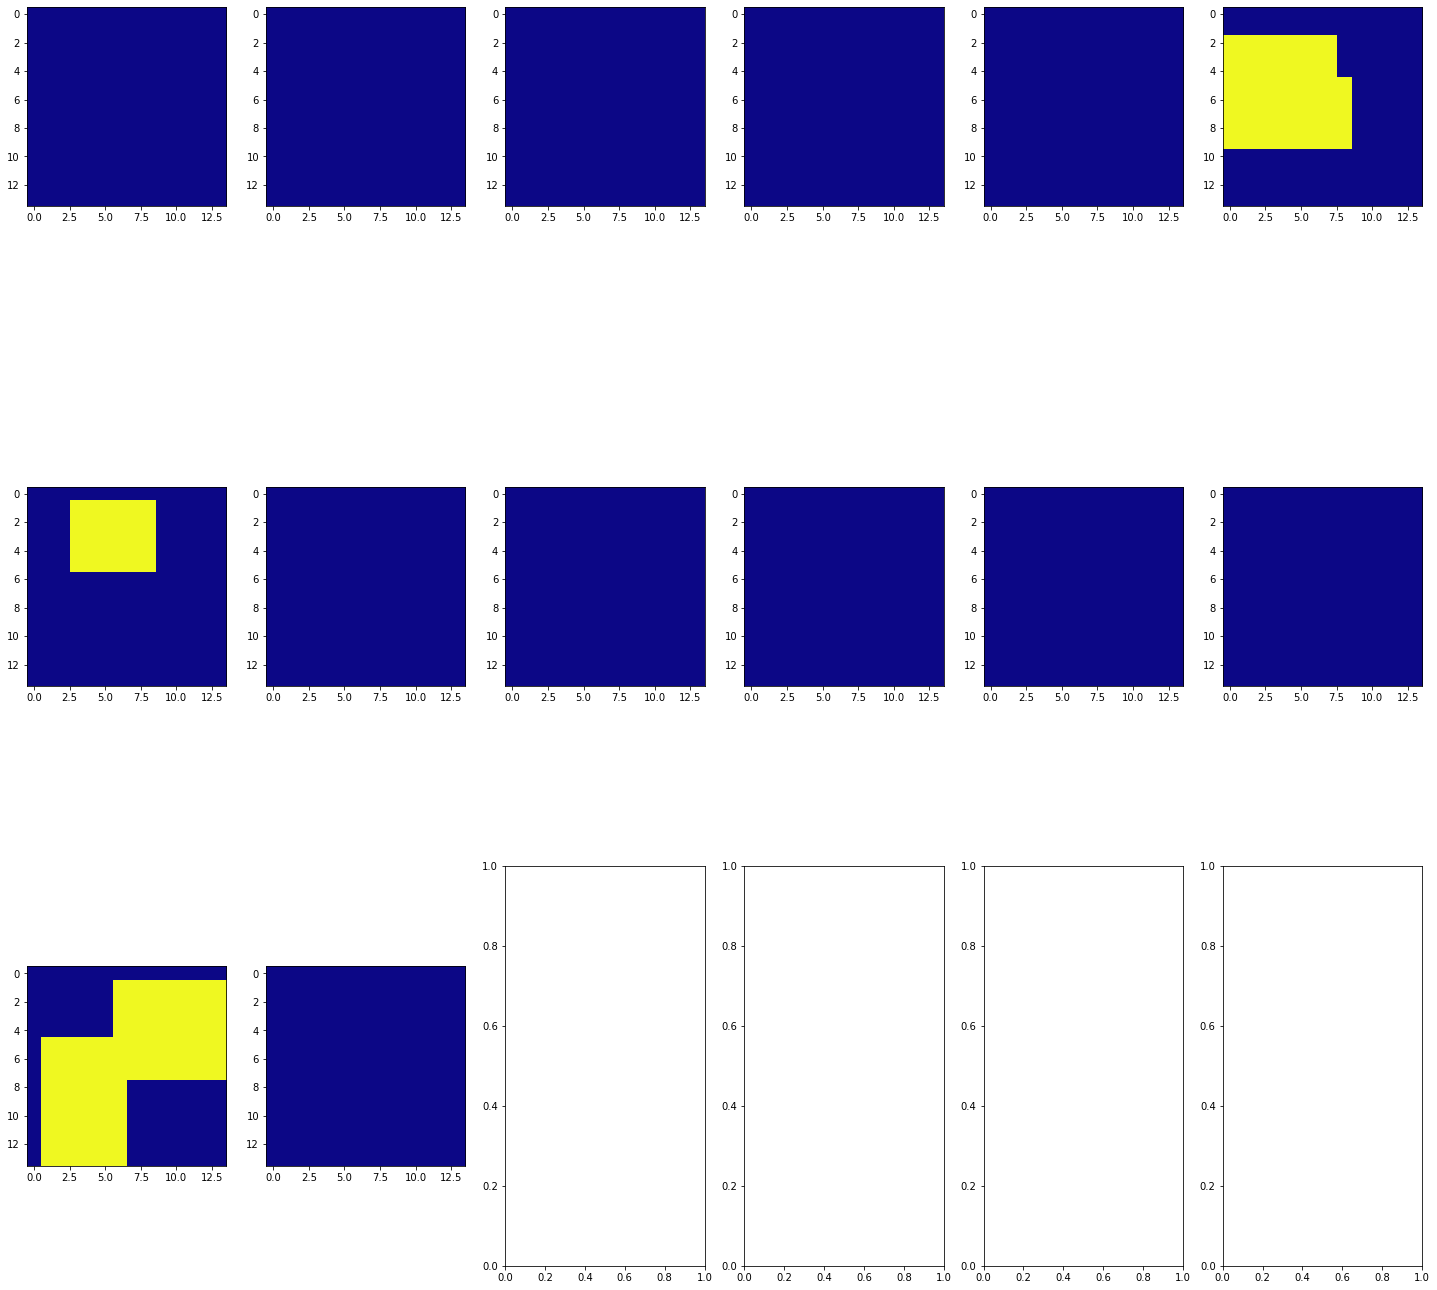

In [197]:
fig, axes = plt.subplots(ncols=6, nrows=3, figsize=(25, 25), facecolor = (STYLE))

axes = axes.ravel() # flats

for index in range(14):
    axes[index].imshow(void[index,:,:], cmap = "plasma")

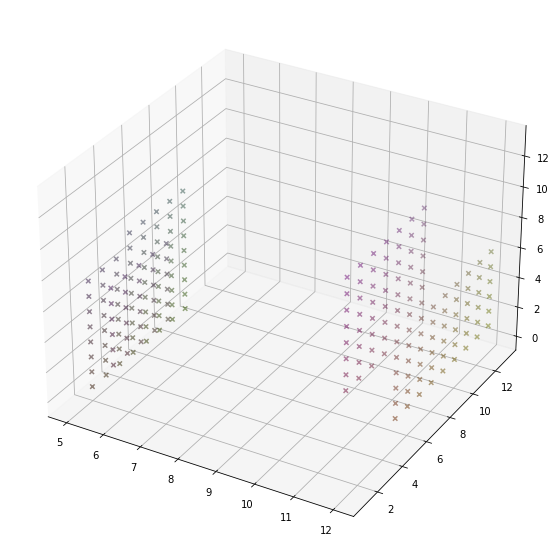

In [199]:
space = np.array(void.nonzero()) # cordinates of the non zero values

space = space.T

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(projection="3d")

ax.scatter(space[:,0], space[:,1], space[:,2], marker = "x", alpha = 0.5, c=space/28)

In [71]:
def add_planes_X(void, number_of_planes):
  
  for plane_X in range(number_of_planes):

    X = random.randrange(0, 28)

    Y = random.randrange(3, 18, 2) # np.random.randint(low= 3, high = 16)

    Z = random.randrange(3, 18, 2)
    
    CENTER = np.random.randint(low= 7, high = 16, size = (2))
    
    slide_start_Y = (CENTER[0] - int((Y/2)))
    
    slide_stop_Y = (CENTER[0] + int((Y/2))+1)
    
    slide_start_Z = (CENTER[1] - int((Z/2)))
    
    slide_stop_Z = (CENTER[1] + int((Z/2))+1)

    print(f"================ Creating Plane Number {plane_X} for X ================")
    print(f"Chosen [X] Plane number {plane_X} = {X}")
    print(f"Height [Z] Plane number {plane_X} = {Z}")
    print(f"Width [Y] Plane number {plane_X} = {Y}")
    print(f"=========================================================")
    print(f"Center is coordinates {CENTER[0]}, {CENTER[1]}")
    print(f"The center on Width [Y] Plane number {plane_X} axis = {int((Y/2)+1)}")
    print(f"The center on Height [Z] Plane number {plane_X} axis = {int((Z/2)+1)}")
    print(f"=========================================================")
    print(f"SLICE ON Y {slide_start_Y} : {slide_stop_Y}")
    print(f"SLICE ON Z {slide_start_Z} : {slide_stop_Z}")
    print(f"===============================================================")
    print("")
    
    # if TL_coner < 0 or TR_coner < 0 or BL_coner < 0 or BR_coner < 0:
    
    solid = np.ones((Y, Z))
    
    void[X, slide_start_Y:slide_stop_Y, slide_start_Z:slide_stop_Z] = solid
  
  return void